## Handson tambahan Seleksi Fitur dengan Feature Importance
Pertama, konfirmasikan bahwa Anda telah menginstal library scikit-learn versi modern.

Ini penting karena beberapa model yang akan kita jelajahi dalam tutorial ini memerlukan versi perpustakaan modern.

Anda dapat memeriksa versi library  yang telah Anda instal dengan contoh kode berikut:

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.1


Versi scikit-learn yaitu 0.24, sudah lebih tinggi dari versi referensi contoh ini

#### Dataset Uji
Selanjutnya, mari kita tentukan beberapa dataset pengujian yang dapat kita gunakan sebagai dasar untuk mendemonstrasikan dan menjelajahi skor feature importance.

Setiap soal uji  memiliki lima fitur (importance) penting dan lima fitur (unimportance)tidak penting, dan mungkin menarik untuk melihat metode mana yang konsisten dalam menemukan atau membedakan fitur berdasarkan (importance) nya.

#### Dataset Klasifikasi
Kita akan menggunakan *make_classification() function* untuk membuat dataset uji: klasifikasi biner.
Dataset akan memiliki 1.000 contoh, dengan 10 fitur input, lima di antaranya akan informatif dan lima sisanya akan redundan. Kami akan memperbaiki seed nomor acak untuk memastikan kami mendapatkan contoh yang sama setiap kali kode dijalankan.

Contoh membuat dan meringkas dataset tercantum di bawah ini.

In [5]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Menjalankan contoh akan membuat dataset dan mengonfirmasi jumlah sampel dan fitur yang diharapkan.(di atas)

Kita akan menggunakan *make_regression() function* untuk membuat dataset uji regresi.
Seperti dataset klasifikasi, dataset regresi akan memiliki 1.000 contoh, dengan 10 fitur input, lima di antaranya akan informatif dan lima sisanya akan redundan.

In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

Menjalankan contoh akan membuat dataset dan mengonfirmasi jumlah sampel dan fitur yang diharapkan.
Selanjutnya, mari kita lihat lebih dekat koefisien sebagai skor *importance*.

### Koefisien sebagai Feature Importance
Algoritma ML Linier cocok dengan model di mana prediksinya adalah jumlah bobot dari nilai input.

Contohnya termasuk regresi linier, regresi logistik, dan ekstensi yang menambahkan regularisasi, seperti regresi punggungan dan jaring elastis.

Semua algoritma ini menemukan satu set koefisien untuk digunakan dalam jumlah tertimbang untuk membuat prediksi. Koefisien ini dapat digunakan secara langsung sebagai tipe kasar dari skor kepentingan fitur.

Mari kita lihat lebih dekat menggunakan koefisien sebagai  *Feature Importance* untuk klasifikasi dan regresi. Kami akan menyesuaikan model pada dataset untuk menemukan koefisien, kemudian meringkas skor importance untuk setiap fitur input dan akhirnya membuat diagram batang untuk mendapatkan gambaran tentang *importance* relatif fitur tersebut.

### Feature Importance Regresi Linier
Kita dapat memasukkan model LinearRegression pada dataset regresi dan mengambil  coeff_ property yang berisi koefisien yang ditemukan untuk setiap variabel input.

Koefisien ini dapat memberikan dasar untuk skor kepentingan fitur kasar. Ini mengasumsikan bahwa variabel input memiliki skala yang sama atau telah diskalakan sebelum memasang model.

Contoh lengkap koefisien regresi linier untuk kepentingan fitur tercantum di bawah ini.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


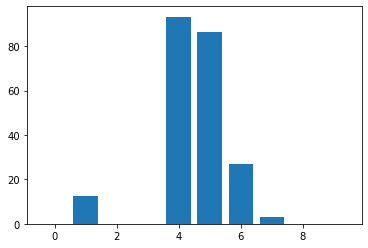

In [4]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Menjalankan contoh sesuai dengan model, lalu melaporkan nilai koefisien untuk setiap fitur.

Catatan: Hasil Anda mungkin berbeda karena sifat stokastik dari algoritme atau prosedur evaluasi, atau perbedaan dalam presisi numerik. Pertimbangkan menjalankan contoh beberapa kali dan membandingkan hasil rata-rata.

Skor menunjukkan bahwa model menemukan lima fitur penting dan menandai semua fitur lainnya dengan koefisien nol, yang pada dasarnya menghapusnya dari model.

Masih ada feature importance lainnya, seperti Decision Tree; Regresi Logistik; Random Forest; XGBoost, Permutasi. Sumber: https://machinelearningmastery.com/calculate-feature-importance-with-python/  